# 프로젝트 : 가위바위보 분류기 만들기

## 1. 데이터 준비하기

본 프로젝트는 과제 제출을 위해 최초 아이펠 구성원로부터 공유받은 이미지 데이터와 하이퍼파라미터를 조절을 통해 여러번에 걸쳐 테스트를 거쳤으나 정확도 수준이 45~60% 에서 계속 머물렀습니다.   
그래서 __저조한 정확도에 대한 원인__이 __"이미지의 다양성에 있지 않을까?"__ 라는 생각을 하게 되었고, 가설에 대한 검증을 위해 __구글 텐서플로우에서 제공하는 가위바위보 데이터셋을 이용__ 하였고, 높은 정확도에 도달하였기 때문에 해당 데이터셋을 바탕으로 최종 프로젝트를 제출하였음을 미리 밝힙니다.

### 1-1. 데이터 만들기
- 구글 teachable machine 사이트를 이용해 가위바위보 이미지 데이터를 만든다.
- URL : https://teachablemachine.withgoogle.com/

### 참고. 구글 텐서플로우 데이터셋
- URL : https://www.tensorflow.org/datasets/catalog/rock_paper_scissors

### 1-2. 디렉토리 생성
- 파일을 저장할 디렉토리를 생성한다

In [158]:
# 디렉토리 만들기
# mkdir - p

In [159]:
# train_data 디렉토리
# ~/aiffel/exploration/E01/train/rock
# ~/aiffel/exploration/E01/train/scissors
# ~/aiffel/exploration/E01/train/paper

### 1-3. 이미지 업로드 및 압축해제

In [160]:
# 이미지 업로드
# 쥬피터 노트북 이용(.zip 파일 드래그 앤 드롭)

In [161]:
# 이미지 압축 해제
# 원하는 디렉토리 이동 : cd ~/aiffel/exploration/E01/train/rock
# 압축 해제 명령어 : unzip 파일명.zip
# 가위, 보에 대해서도 똑같이 실행

## 2. 데이터 전처리(이미지 리사이징)

In [162]:
# PIL(pillow) 라이브러리 사용

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [163]:
# 이미지 사이즈 변경 함수 만들기

def resize_images(img_path):
    # glob.glob : 모든 png 파일을 읽어온다.
    images=glob.glob(img_path + "/*.png")
    
    print(len(images), " images to be resized.")

    # 이미지 사이즈를 모두 28x28 로 바꾸어 저장
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img)
    
    print(len(images), " images resized.")

In [164]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들이고,
#파일마다 모두 28x28 사이즈로 바꾸어 저장한다.'''

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료")

839  images to be resized.
839  images resized.
가위 이미지 resize 완료


In [165]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들이고,
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/train/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

840  images to be resized.
840  images resized.
바위 이미지 resize 완료


In [166]:
# 보 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들이고
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료")

840  images to be resized.
840  images resized.
보 이미지 resize 완료


## 3. train data 불러오기

In [167]:
import numpy as np

# load_data 함수 만들기
def load_data(img_path):  
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2519 # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=4
    
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path +'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/train"
(x_train, y_train) = load_data(image_dir_path)

x_train_norm = x_train / 255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2519 입니다.
x_train shape: (2519, 28, 28, 4)
y_train shape: (2519,)


라벨(정답)은:  0 입니다.


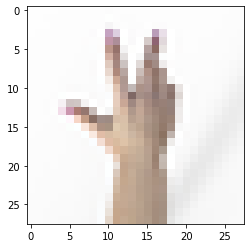

In [168]:
# 불러온 이미지 샘플 확인하기

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨(정답)은: ', y_train[0], '입니다.')

## 4. 딥러닝 네크워크 설계하기

In [169]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model 생성
model = keras.models.Sequential()

# 28x28 pixel의 컬러 이미지 파일에 대해 16개의 이미지 특징을 고려함
model.add(keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,4)))
model.add(keras.layers.MaxPool2D(2,2))

# 첫번째 이미지 특징 저장한 이후 32개의 이미지 특징을 고려함
model.add(keras.layers.Conv2D(32, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

# 분류기의 알고리즘 복잡도 설정
model.add(keras.layers.Dense(32, activation="relu"))

# 총 클래스의 개수 가위,바위,보 = 3가지
model.add(keras.layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        592       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

## 5. 딥러닝 네크워크 학습시키기

In [170]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# 분류기의 학습횟수 설정
model.fit(x_train_norm, y_train, epochs=8)

Epoch 1/8
79/79 [==============================] - 1s 3ms/step - loss: 1.0253 - accuracy: 0.5073
Epoch 2/8
79/79 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.9159
Epoch 3/8
79/79 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.9818
Epoch 4/8
79/79 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9939
Epoch 5/8
79/79 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9958
Epoch 6/8
79/79 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9985
Epoch 7/8
79/79 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9996
Epoch 8/8
79/79 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9989


## 6. test data로 모델 평가하기

In [171]:
# test 디렉토리 생성
# mkdir -p ~/aiffel/exploration/E01/test

In [172]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들이고,
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

124  images to be resized.
124  images resized.
가위 이미지 resize 완료!


In [173]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들이고,
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

124  images to be resized.
124  images resized.
바위 이미지 resize 완료


In [174]:
# 보 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들이고
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료")

124  images to be resized.
124  images resized.
보 이미지 resize 완료


In [175]:
import numpy as np

def load_data(img_path):  
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=372 # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=4
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path +'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터(x_test)의 이미지 개수는 372 입니다.
x_test shape: (372, 28, 28, 4)
y_test shape: (372,)


라벨(정답)은:  0 입니다.


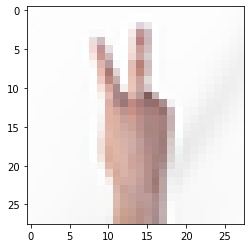

In [176]:
plt.imshow(x_test[0])
print('라벨(정답)은: ', y_test[0], '입니다.')

In [177]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 0.3602 - accuracy: 0.8387
test_loss: 0.3601795732975006 
test_accuracy: 0.8387096524238586


## 7. 회고

### 1차 시도
- 아이펠 동료 분들이 공유해주신 가위바위보 이미지 1500장을 train data, 내 데이터 300장을 test data로 활용해 최초 모델 정확도 평가를 진행하였다.  
- 학습 데이터의 정확도는 98% 이상으로 높은 수치를 보였으나 test data를 통한 정확도는 33%에 불과 하였다.

### 2차 ~ n차 시도(10번 이상 반복한 것 같다.)

#### 1) 2차 시도
- __"학습 데이터의 양이 부족하여 정확도가 낮은 것이 아닐까"__ 라는 생각이 들어 공유 해주신 모든 데이터를 내려받으니 __4500장__ 정도였다.  
- test data도 데이터 퀄리티에 대한 의문이 생겨 아이펠 클라우드에서 기본으로 제공하고 있는 test data 300장을 가져와 활용하였다.  
- 하이퍼파라미터도 계속해서 수치를 조정해가며 정확도를 높이기 위해 노력하였다.

#### 2) n차 시도(고민의 연속)  
- 2차시도에서 정확도가 45% 정도 수준으로 10% 이상 상승하였으나, 그 이후 __45~59% 수준의 정확도__ 에서 정체되었다.
- 하이퍼파라미터도 conv2d를 각각 512, 1024, dense도 1024까지 올려서 테스트를 진행하였는데. 정확도가 일시적으로 66%까지 상승하였으나 학습 시간이 너무 오래걸렸다.
- 학습횟수(epochs)도 10~40회까지 다양하게 조정했는데, 횟수가 올라갈수록 오히려 train data의 학습 정확도가 떨어지는 현상이 발생하였다.
- 결국, 하이퍼파라미터와 epochs를 늘리면 학습하는데 시간이 너무 오래 걸리는 문제와 모델의 정확도를 신뢰하기 힘들다고 판단하였다.

### 최종 시도

#### 1) 아지트 게시물에 올라온 교감쌤 댓글 힌트를 통해 생각의 전환을 시도 하였다.

#### 2) 이미지의 퀄리티
- 비단 이미지 뿐만 아니라 일반적인 데이터 분석을 할때도 데이터의 퀄리티는 매우 중요하다. 즉, 결측치나 이상치가 많으면 정확한 데이터 분석이 어렵기 때문에 전처리를 통해 데이터 퀄리티를 관리하는게 중요하다.
- __기존에 공유 받은 이미지들은 다양성은 확보한 듯 보였으나 가위바위보의 뒷배경이 깔끔하지 않아 뒷배경이 깔끔한 이미지를 찾아보기로 했다.__

#### 3) 이미지의 다양성
- 구글에서 이미지를 찾아보던 중 텐서플로우에서 제공하는 가위바위보 데이터셋을 확인해보니 단순히 손 모양 뿐만 아니라 __피부색, 손톱의 색깔__ 등도 포함된 이미지를 제공하여 이미지의 다양을 더 확보할 수 있겠다는 생각이 들었다.

#### 4) 테스트 결과
- 구글 텐서플로우 가위바위보 데이터셋을 활용하여 모델 학습과 평가를 진행하였고 __최종 평가 정확도는 80~93% 수준으로 이전 데이터에 비해 아주 높은 정확도를 보여주었다.__

#### 5) 아쉬웠던 점
- 구글에서 제공한 데이터셋이 png 파일이였기 때문에 용량을 줄이고자 jpg 파일로 변환을 시도하였으나 거듭 실패하였다. 어떻게든 다시 해결해볼 예정이다.
- 나 자신이나 동료들의 힘으로 직접 만든 데이터가 아닌 기본 제공 데이터로 최종 실험을 해서 나온 결과라는 점이 아쉽다.
- 데이터 성능을 높일 수 있는 다른 방법을 시도해보지 못해 아쉽다.(텐서플로우를 활용한 이미지 증강을 사용한 조원도 있었는데 내가 코드를 이해하지 못해 따라하지 못했다.)